In [1]:
#import tensorflow
from tensorflow.keras import layers, models
import numpy as np
#from sklearn import preprocessing
import os
#import cv2
#import matplotlib.pyplot as plt
import random
import joblib

In [5]:
path2 = os.path.dirname(os.path.realpath("__file__")) + '\\state-farm-distracted-driver-detection\\imgs\\train\\c0\\img_100026.jpg'
path = os.path.dirname(os.path.realpath("__file__")) + '\\state-farm-distracted-driver-detection\\imgs\\train\\'
cTotal = list()

In [6]:
#listImages = dict()
def normalizeImg(img):
    return img / 255
normalizeImgV = np.vectorize(normalizeImg)
random.seed(0)

def processingImg(path):
    listLabels = os.listdir(path)
    #listImg = list()
    #print(listLabels)
    #counter = 0
    # listLabels = listLabels[0]
    for x in listLabels:
        newPath = path + x + "\\"
        imgLabel = os.listdir(newPath)
        print(x)
        for y in imgLabel:
            grayPath = newPath + y
            grayImg = cv2.imread(grayPath, 0)
            row, column = (120, 160)
            #row, column = int(grayImg.shape[0]/4), int(grayImg.shape[1]/4)
            grayImg = cv2.resize(grayImg, (column, row))
            #grayImg = normalizeImgV(grayImg)
            #grayImg = grayImg.tolist()
            grayImg = grayImg/255
            grayImg = (int(x[-1]), grayImg)
            cTotal.append(grayImg)
    return cTotal

cTotal = processingImg(path)

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9


In [2]:
def saveVariable(x, keyName):
    tmp = str(keyName) + ".sav"
    joblib.dump(x, tmp)
    
def loadVariable(keyName):
    tmp = str(keyName) + ".sav"
    return joblib.load(tmp)


def isEmptyFile(keyName):
    tmp = str(keyName) +".p"
    if os.path.exists(tmp) == False:
        return True
    if os.path.getsize(tmp) == 0:
        return True
    return False
#cTotal = {"c0": c0,"c1": c1, "c2": c2, "c3": c3, "c4": c4, "c5": c5, "c6": c6, "c7": c7, "c8": c8, "c9": c9}
#for x in cTotal.keys():
#    if isEmptyFile(x):
#        saveVariable(cTotal[x] , x)

['xTrain.sav']

In [2]:
#xTrain = joblib.load("xTrain.sav")

In [4]:
#xTrain.shape

(22424, 120, 160, 1)

In [ ]:
img = cv2.imread(path2, 0)
row, column = int(img.shape[0]/4), int(img.shape[1]/4)
#print(img)
img = cv2.resize(img, (column, row))
plt.imshow(img, cmap="gray")
#def normalizeImg(img):
#    return img / 255
#normalizeImgV = np.vectorize(normalizeImg)
#normalizeImgV(img)

In [3]:
def randomizeData(cTotal):
    random.shuffle(cTotal)
    return cTotal

def parsingData(cTotal):
    yTrain = [x for x, y in cTotal]
    xTrain = [y for x, y in cTotal]
    #xTrain = np.array(xTrain, dtype="uint8")
    #yTrain = np.array(yTrain, dtype="uint8")
    xTrain = np.array(xTrain, dtype="<f")
    yTrain = np.array(yTrain, dtype="uint8")
    return xTrain, yTrain

In [ ]:
randomizeData(cTotal)
xTrain, yTrain = parsingData(cTotal)

In [9]:
xTrain = xTrain.reshape(22424, 120, 160, 1)

In [34]:
#yTrain.shape

(20181,)

In [10]:
#saveVariable(xTrain, "xTrain")
#saveVariable(yTrain, "yTrain")

In [38]:
xTrain = loadVariable("xTrain")
yTrain = loadVariable("yTrain")

MemoryError: Unable to allocate array with shape (430540800,) and data type float32

In [11]:
xTest = xTrain[int(len(xTrain)*0.9):]
yTest = yTrain[int(len(xTrain)*0.9):]
xTrain = xTrain[:int(len(xTrain)*0.9)]
yTrain = yTrain[:int(len(yTrain)*0.9)]

In [4]:
trainingImgs = loadVariable("traingImgs")
testImgs = loadVariable("testImgs")

In [5]:
randomizeData(trainingImgs)
randomizeData(testImgs)
xTrain, yTrain = parsingData(trainingImgs)
xTest, yTest = parsingData(testImgs)

In [6]:
xTrain = xTrain.reshape(len(xTrain), 120, 160, 1)
xTest = xTest.reshape(len(xTest), 120, 160, 1)

In [ ]:
xTrain[0].shape

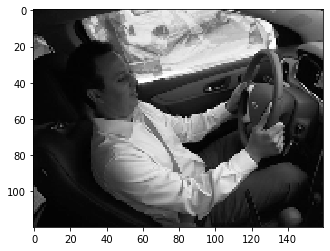

In [60]:
plt.imshow(xTest[32].reshape(120,160), cmap="gray")

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(120,160,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

#model.add(layers.Conv2D(32, (3,3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 158, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 77, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 18, 64)        0         
_________________________________________

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding="same", activation='relu', input_shape=(120,160,1)))
model.add(layers.Conv2D(32, (3,3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding="same", activation='relu'))
#model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))
#model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 120, 160, 32)      320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 120, 160, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 80, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 60, 80, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 60, 80, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 40, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 40, 128)      

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
l2regulizer
VGG, ResNet

In [ ]:
model.fit(xTrain, yTrain, epochs=2, batch_size=128)

Train on 19996 samples
Epoch 1/2


In [ ]:
test_loss, test_acc = model.evaluate(xTest, yTest)

In [20]:
#What I'm trying to beat
test_loss, test_acc = model.evaluate(xTest, yTest)

1906/1906 [==============================] - 10s 5ms/sample - loss: 3.4581 - acc: 0.5079


In [28]:

test_loss, test_acc = model.evaluate(xTest, yTest)

1906/1906 [==============================] - 8s 4ms/sample - loss: 2.2518 - acc: 0.4738


In [ ]:
google Colab


In [ ]:
np.array(xTrain, dtype="uint8")

In [ ]:
#pickle.dump(c0, open("c0.p", "wb"))
#pickle.dump(c0, open("c0.p", "wb"))

In [ ]:
#print(x)

In [17]:
test_acc

0.9759251

In [11]:
y_test_hat_mat = model.predict(xTest)
y_test_hat = np.argmax(y_test_hat_mat, axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yTest, y_test_hat, labels=range(10))

In [12]:
cm

array([[152,   0, 118,   0,   0,   7,   5,   0,   2,   4],
       [ 54, 120,  38,   1,   0,   0,   6,   0,   2,   0],
       [ 11,   6, 162,   0,   0,   0,   0,   3,  43,   3],
       [ 88,   3,  85,  36,   1,  20,   0,   0,  29,   4],
       [ 84,   0,  94,   9,  20,  11,  13,   0,  34,   4],
       [  6,   0,  50,   0,   0, 209,   0,   0,   1,   0],
       [  2,  31,  30,   2,   7,   0, 143,   7,  16,   1],
       [  1,   4,  27,   0,   1,   0,  11, 158,  33,   0],
       [ 44,   5,  13,   0,   0,  10,   0,   0, 131,   3],
       [ 83,   2,   9,  15,   1,  10,  31,   0,  48,  10]], dtype=int64)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(120, 160, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPooling2D(pool_size=(8, 8)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])